# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

Informasi tentang Dataset:
-  Sumber Dataset
  Dataset diperoleh dari Kaggle https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset/data

- Ketentuan Dataset
  Tanpa Label:
  
  Dataset ini tidak memiliki kolom yang jelas menunjukkan label atau kelas.

- Deskripsi Atribut Data:

1.  age: (numeric)
2. job: jenis pekerjaan (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital: Status Perkawainan (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education: Tingkat pendidikan(categorical: primary, secondary, tertiary and unknown)
5. default: Memiliki kredit atau tidak (categorical: 'no','yes','unknown')
6. balance: Jumlah saldo rekening responden.
7. housing: Memiliki pinjaman rumah atau tidak? (categorical: 'no','yes','unknown')
8. loan: memiliki pinjaman pribadi atau tidak? (categorical: 'no','yes','unknown')  

8. contact: jenis komunikasi/teknologi (categorical: 'cellular','telephone')
9.  day: terakhir di contact dalam hari (categorical: 'mon','tue','wed','thu','fri')
10. month: terakhir di hubungi dalam bulan (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
11. duration: durasi waktu contact, in seconds (numeric).

12. campaign: jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini (numeric, includes last contact)
13. pdays: jumlah hari yang telah berlalu setelah klien terakhir kali dihubungi dari kampanye sebelumnya
 (numeric; 999 means client was not previously contacted)
14. previous: jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini (numeric)
15. poutcome: hasil dari kampanye pemasaran sebelumnya (categorical: 'failure','nonexistent','success')
17. deposit: apakah responden memiliki deposti atau tidak (yes/no)


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
import warnings  # Mengabaikan warning yang tidak terlalu berarti
warnings.filterwarnings('ignore') # Mengabaikan warning yang tidak terlalu berarti

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

df = pd.read_csv('/content/drive/My Drive/ML Study/Dicoding/bank.csv')
print(f'Jumlah baris: {df.shape[0]}')
print(f'Jumlah kolom: {df.shape[1]}')

Mounted at /content/drive/
Jumlah baris: 11162
Jumlah kolom: 17


Keterangan:

Dataset dihubungkan ke google drive untuk mengambil dataset. jumlah baris yang pada dataset ini yaitu 11162 dan jumlah kolom yaitu 17 fitur.

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Memahami Dataset

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
# Cek missing value
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [7]:
df.duplicated().sum()

0

## Distribusi Fitur Numerical

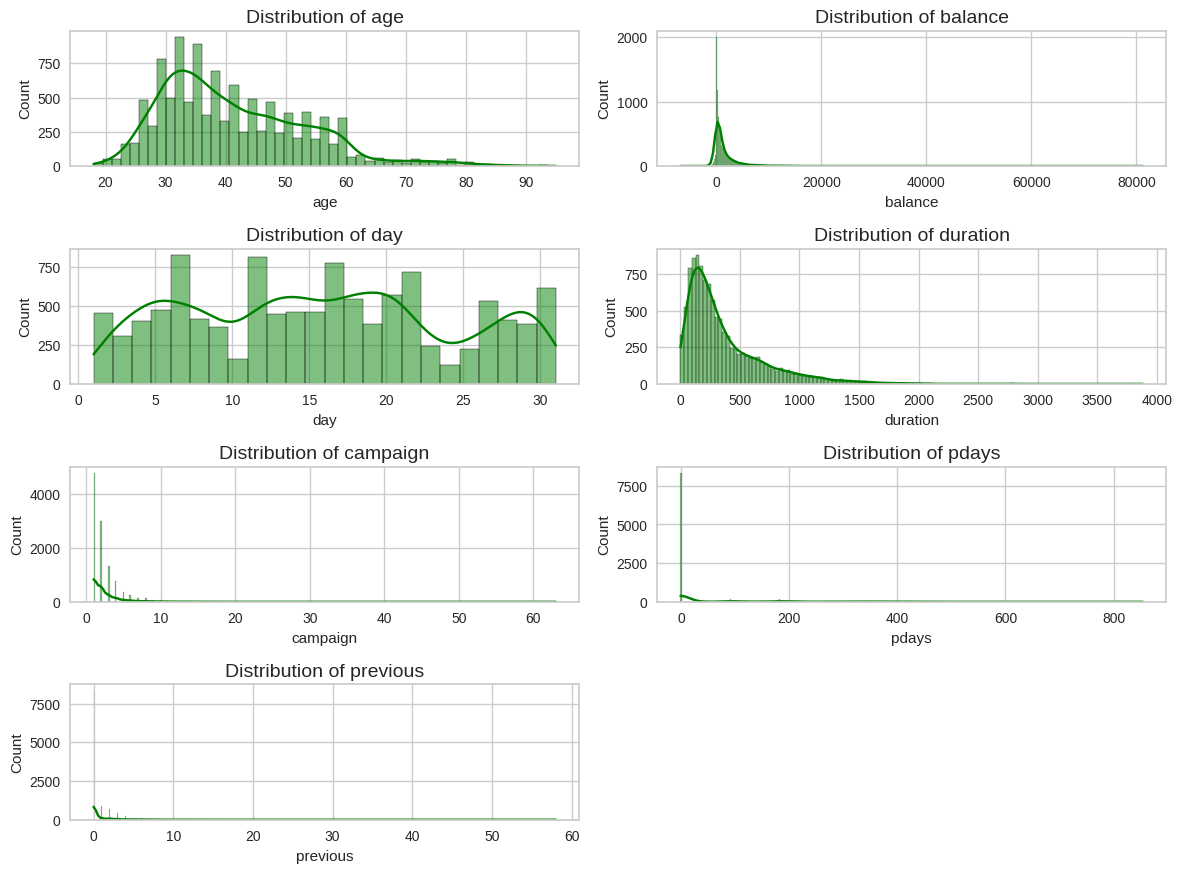

In [8]:
# Visualisasi distribusi variabel numerik menggunakan histogram
numeric_col = df.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(7, 2, figsize=(12, 15))

for i, column in enumerate(numeric_col):
    row = i // 2
    col = i % 2
    sns.histplot(data=df, x=column, kde=True, ax=axes[row, col], color='green')
    axes[row, col].set_title(f'Distribution of {column}', fontsize=14)

for i in range(len(numeric_col), 7 * 2):
    row = i // 2
    col = i % 2
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

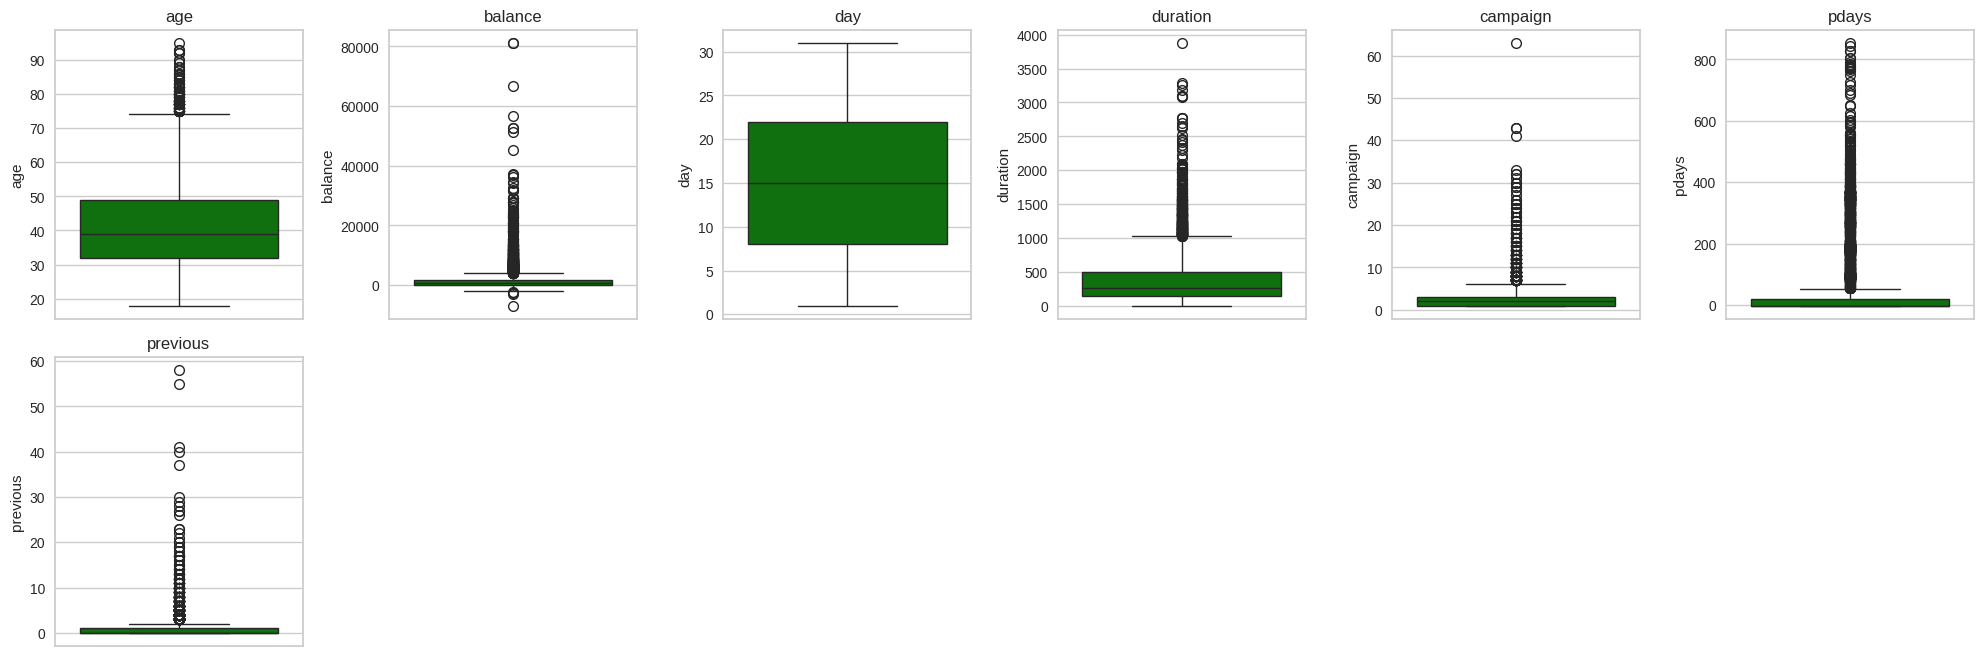

In [9]:
# Visualisasi distribusi variabel numerik menggunakan boxplot
plt.figure(figsize=(20, 10))

for i, column in enumerate(numeric_col):
    plt.subplot(3,6 , i + 1)
    sns.boxplot(y=column, data=df, color='green')
    plt.title(f'{column}')
    plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

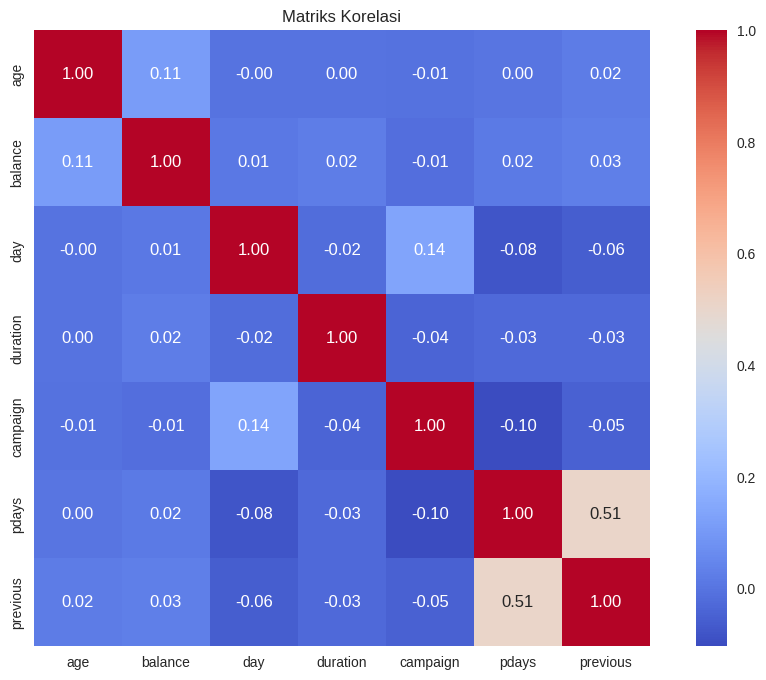

In [10]:
# Visualisasi hubungan antar variabel (misalnya, matriks korelasi)
plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_col].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriks Korelasi')
plt.show()

Informasi:
- Variabel pdays dan previous memiliki korelasi yang tinggi sebesar 0.51.
- Variabel dan dan campaign juga memiliki korelasi yang cukup baik sebesar 0.14
- Variabel day dan pday memiliki korelasi yang paling rendah diantara variabel lain yaitu 0.08

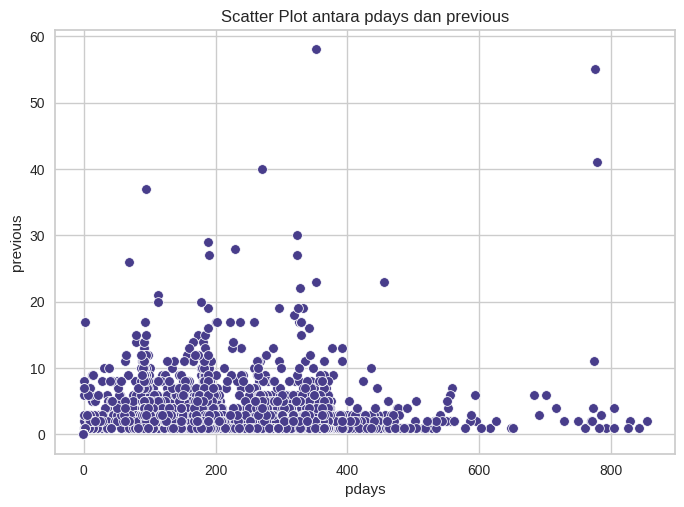

In [11]:
# Scatter plot antara 'pdays' dan 'previous' (korelasi 0.51)
sns.scatterplot(x='pdays', y='previous', data=df, color='darkslateblue')
plt.title('Scatter Plot antara pdays dan previous')
plt.xlabel('pdays')
plt.ylabel('previous')
plt.show()

Informasi:
- Distribusi terdapat banyak pada rentang 0-200
- Hanya terdapat sedikit outlier pada data, dan beberapa data terdapat pada rentang 800

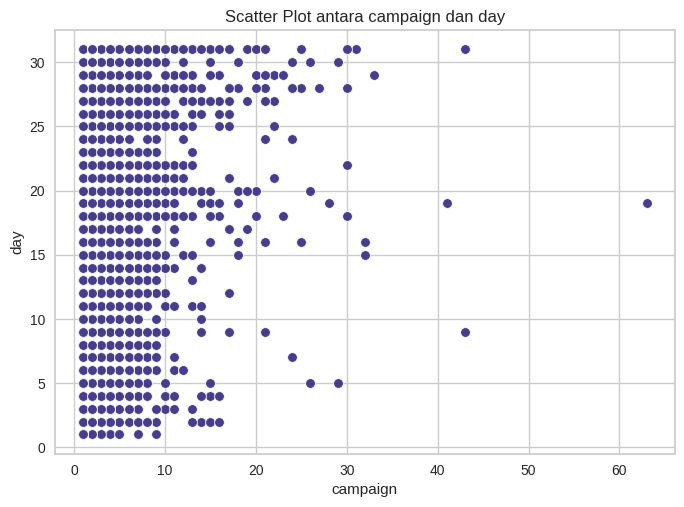

In [12]:
# Scatter plot antara 'campaign' dan 'day' (korelasi 0.14)
sns.scatterplot(x='campaign', y='day', data=df, color='darkslateblue')
plt.title('Scatter Plot antara campaign dan day')
plt.xlabel('campaign')
plt.ylabel('day')
plt.show()

Informasi:
- Distribusi data lebih mengarah ke bagian kiri
- rentang value 0-10 untuk campaign terdapat banyak data terdistribusi dibagian tersebut yang memiliki korelasi dengan total hari.

## Distribusi Fitur Categorical

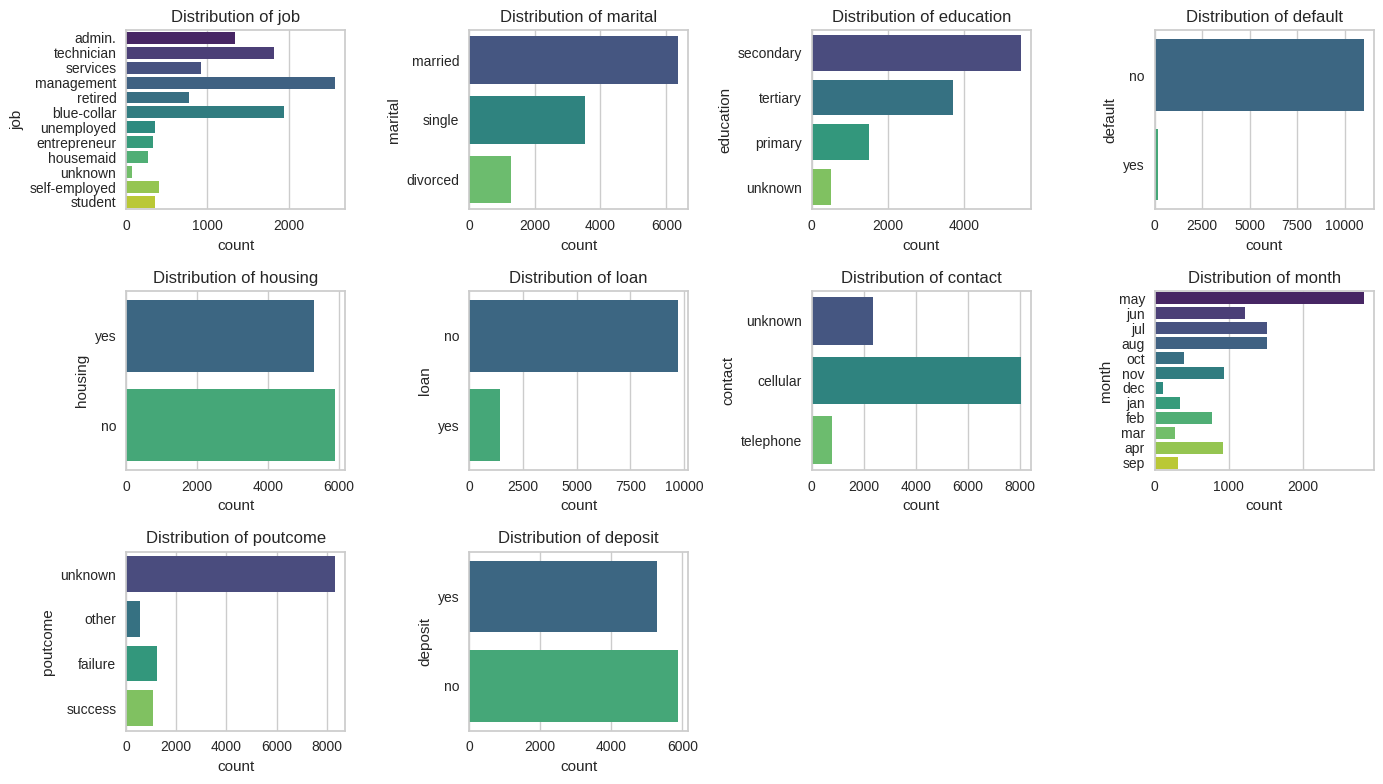

In [13]:
# Distribusi data kategorikal
categrocial_col = df.select_dtypes(include=[object])
plt.figure(figsize=(14,8))
for i, column in enumerate(categrocial_col.columns, 1):
  plt.subplot(3, 4, i)
  sns.countplot(y=df[column], palette='viridis')
  plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

Informasi:
1. Distribution of job
  - top 3 pekerjaan responden yaitu manajement, blue-collar dan technician
2. Distribution of martial
  - Distribusi data banyak terdapat pada kelas married dengan jumlah lebih 6000
3. Distribution of education
  - Distirbusi banyak terdapat pada kelas secondary atau pendidikan menengah
  - Hanya terdapat sedikit distirbusi pada kelasn unknow, artinya kebanyakan responden memiliki riwayat pendidikan yang jelas
4. Distribution of Default
  - distribusi pada variabel ini tidak baik, karena data lebih banyaka pada kelas No dibandingkan yes.
  - Artinya responden kebanyakan tidak memiliki kredit bank
5. Distribution of Housing
  - Tiap memiliki distirbusi yang merata satu dengan lain
6. Distribution of loan
  - Distribusi tidak merata dan lebih banyak mengarah pada kelas no
  - artinya mayoritas responden tidak memiliki pinjaman
7. Distribution of contact
  - distribusi tidak merata dengan kelas lain, data lebih condong ke kelas celuler.
  - artinya responden lebih banyak menggunakan cellular untuk berkomunikasi
8. Distribution of month
  - Distribusi data lebih banyakan mengarah pada kelas may dibandingkan kelas lainnya
9. Distribution of poutcome
  - Terdapat banyak data terdistribusi pada kelas unknown, berjumlah lebih 7500
  - Distribusi ini tidak merata dengan kelas lain
10. Distribution of deposti
  - Distribusi data pada variabel ini cukup bagus, tiap kelas memiliki data yang seimbang
  


In [14]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## Cek Missing Value

In [15]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


## Data Duplicate

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(11162, 17)

## **Mengatasi Outlier**

In [18]:
# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers_IQR(df):
    outlier_indices = []
    for col in df[numeric_col]:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices.extend(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index)
    return set(outlier_indices)

outliers = detect_outliers_IQR(df)
df = df.drop(index=outliers)

print(f'Data After Removing Outliers: {df.shape}')

Data After Removing Outliers: (6557, 17)


Informasi:
Setah melakukan proses mengatasi outlier, data berkurang menjadi 6557 total baris dan 17 total kolom. sebelumnya memiliki total baris 11162 dan total kolom 17

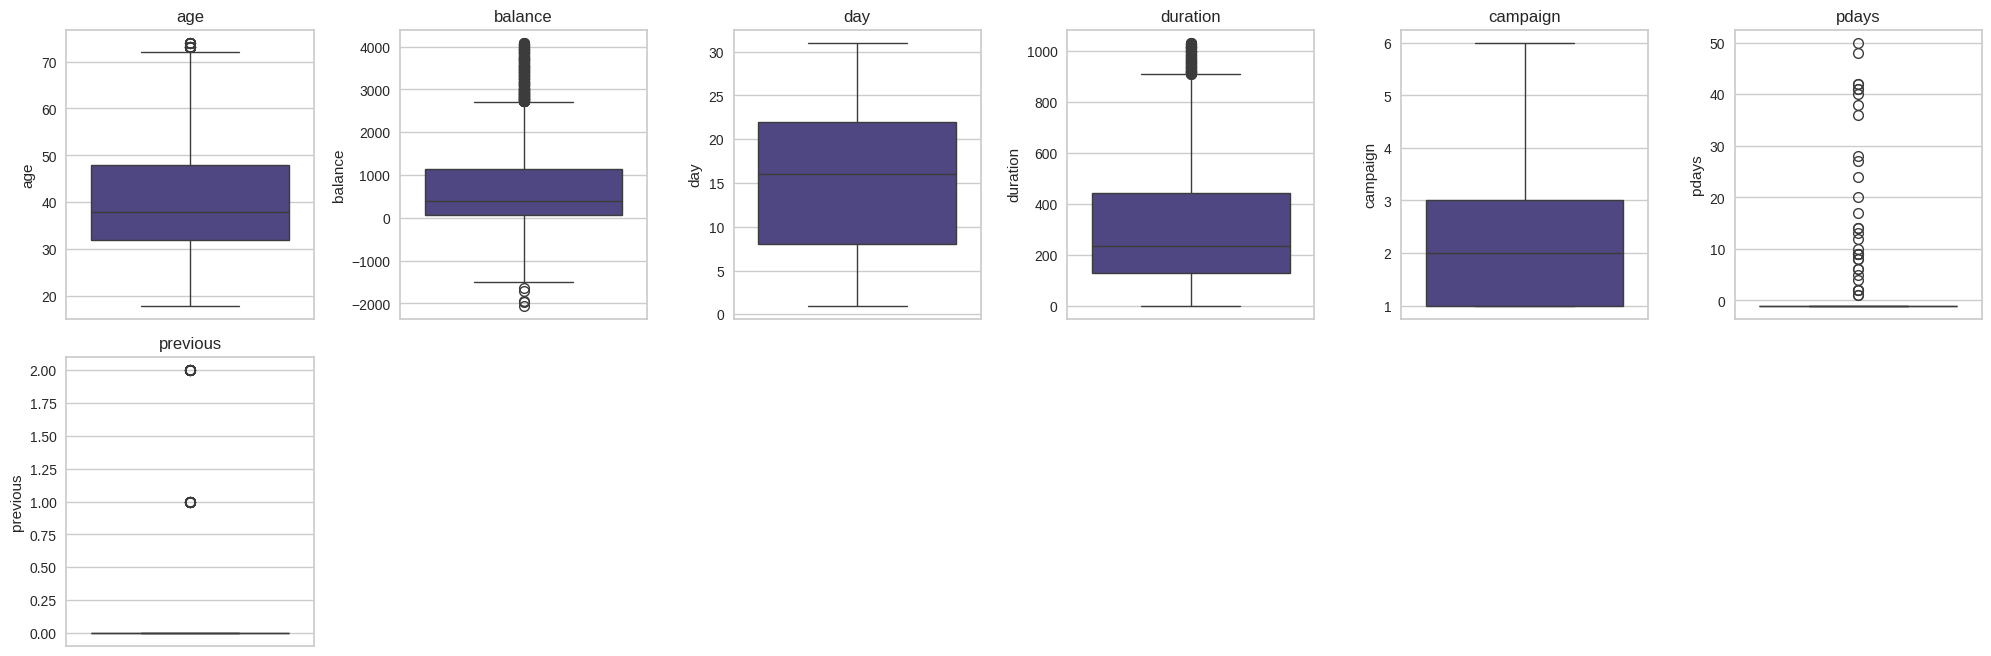

In [19]:
# Visualisasi distribusi variabel numerik menggunakan boxplot setelah menghapus outliers
plt.figure(figsize=(20, 10))

for i, column in enumerate(numeric_col):
    plt.subplot(3, 6, i + 1)
    sns.boxplot(y=column, data=df, color='darkslateblue')
    plt.title(f'{column}')
    plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

In [20]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000
mean,40.218850,756.588989,15.748513,314.693915,2.089523,-0.897514,0.007625
std,10.757058,986.276392,8.453587,243.149203,1.302275,1.808272,0.111577
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,69.000000,8.000000,129.000000,1.000000,-1.000000,0.000000
50%,38.000000,390.000000,16.000000,237.000000,2.000000,-1.000000,0.000000
75%,48.000000,1128.000000,22.000000,442.000000,3.000000,-1.000000,0.000000
max,74.000000,4087.000000,31.000000,1033.000000,6.000000,50.000000,2.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6557 entries, 3 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        6557 non-null   int64 
 1   job        6557 non-null   object
 2   marital    6557 non-null   object
 3   education  6557 non-null   object
 4   default    6557 non-null   object
 5   balance    6557 non-null   int64 
 6   housing    6557 non-null   object
 7   loan       6557 non-null   object
 8   contact    6557 non-null   object
 9   day        6557 non-null   int64 
 10  month      6557 non-null   object
 11  duration   6557 non-null   int64 
 12  campaign   6557 non-null   int64 
 13  pdays      6557 non-null   int64 
 14  previous   6557 non-null   int64 
 15  poutcome   6557 non-null   object
 16  deposit    6557 non-null   object
dtypes: int64(7), object(10)
memory usage: 922.1+ KB


In [22]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,34,blue-collar,single,secondary,no,-72,yes,no,cellular,7,jul,273,5,-1,0,unknown,no
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no


## Binning

In [23]:
# Membuat inisialisasi untuk binnning variabel kategorical
# 1. Binning 'job'
job_bins = {
    'white-collar': ['admin.', 'management', 'technician', 'entrepreneur', 'self-employed'],
    'blue-collar': ['blue-collar', 'housemaid'],
    'unemployed': ['unemployed', 'student'],
    'retired': ['retired'],
    'services': ['services', 'unknown']
}

# fungsi bining job
def map_job_to_bin(job):
    for category, jobs in job_bins.items():
        if job in jobs:
            return category
    return 'others'

# Terapkan binning ke kolom 'job'
df['job_binned'] = df['job'].apply(map_job_to_bin)

# 2. binning kolom month
month_bins = {
    'Q1': ['jan', 'feb', 'mar', 'apr'],
    'Q2': ['may', 'jun', 'jul', 'aug'],
    'Q3': ['sep', 'oct', 'nov', 'dec'],
}

# fungsi binning
def map_month_to_quarter(month):
    for quarter, months in month_bins.items():
        if month in months:
            return quarter
    return 'unknown'

# menerapkan fungsi ke kolom 'month'
df['month_binned'] = df['month'].apply(map_month_to_quarter)

# 3. binning poutcome
poutcome_bins = {
    'success': ['success'],
    'failure': ['failure'],
    'other': ['other', 'unknown']
}

# fungsi binning
def map_poutcome_to_bin(poutcome):
    for category, outcomes in poutcome_bins.items():
        if poutcome in outcomes:
            return category
    return 'others'  # Default fallback if not matched

# menerapkan fungsi ke kolom 'poutcome'
df['poutcome_binned'] = df['poutcome'].apply(map_poutcome_to_bin)

# Menampilkan distribusi fitur
binned_features_summary = {
    'job_binned': df['job_binned'].value_counts(),
    'month_binned': df['month_binned'].value_counts(),
    'poutcome_binned': df['poutcome_binned'].value_counts()
}

binned_features_summary

{'job_binned': job_binned
 white-collar    3737
 blue-collar     1446
 services         626
 unemployed       404
 retired          344
 Name: count, dtype: int64,
 'month_binned': month_binned
 Q2    4587
 Q1    1215
 Q3     755
 Name: count, dtype: int64,
 'poutcome_binned': poutcome_binned
 other      6539
 failure      11
 success       7
 Name: count, dtype: int64}

In [24]:
# Membuat inisialisasi untuk binnning variabel numerical
# Binning 'balance'
balance_bins = [-float('inf'), 0, 1000, 5000, float('inf')]
balance_labels = ['Negative', 'Low', 'Medium', 'High']
df['balance_binned'] = pd.cut(df['balance'], bins=balance_bins, labels=balance_labels)

# Binning 'age'
age_bins = [0, 30, 50, float('inf')]
age_labels = ['Young', 'Adult', 'Senior']
df['age_binned'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Binning 'duration'
duration_bins = [0, 200, 500, float('inf')]
duration_labels = ['Short', 'Medium', 'Long']
df['duration_binned'] = pd.cut(df['duration'], bins=duration_bins, labels=duration_labels)

# Binning 'campaign'
campaign_bins = [0, 1, 3, float('inf')]
campaign_labels = ['Low', 'Medium', 'High']
df['campaign_binned'] = pd.cut(df['campaign'], bins=campaign_bins, labels=campaign_labels)

# Binning 'pdays'
pdays_bins = [-float('inf'), -1, 20, float('inf')]
pdays_labels = ['Not Contacted', 'Contacted Once', 'Contacted Multiple Times']
df['pdays_binned'] = pd.cut(df['pdays'], bins=pdays_bins, labels=pdays_labels)

# menampilkan hasil binnning
simple_binned_summary = {
    'balance_binned': df['balance_binned'].value_counts(),
    'age_binned': df['age_binned'].value_counts(),
    'duration_binned': df['duration_binned'].value_counts(),
    'campaign_binned': df['campaign_binned'].value_counts(),
    'pdays_binned': df['pdays_binned'].value_counts()
}

simple_binned_summary

{'balance_binned': balance_binned
 Low         3715
 Medium      1802
 Negative    1040
 High           0
 Name: count, dtype: int64,
 'age_binned': age_binned
 Adult     4020
 Senior    1285
 Young     1252
 Name: count, dtype: int64,
 'duration_binned': duration_binned
 Short     2806
 Medium    2354
 Long      1397
 Name: count, dtype: int64,
 'campaign_binned': campaign_binned
 Low       2844
 Medium    2731
 High       982
 Name: count, dtype: int64,
 'pdays_binned': pdays_binned
 Not Contacted               6523
 Contacted Once                22
 Contacted Multiple Times      12
 Name: count, dtype: int64}

In [25]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,poutcome,deposit,job_binned,month_binned,poutcome_binned,balance_binned,age_binned,duration_binned,campaign_binned,pdays_binned
3,55,services,married,secondary,no,2476,yes,no,unknown,5,...,unknown,yes,services,Q2,other,Medium,Senior,Long,Low,Not Contacted
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,...,unknown,yes,white-collar,Q2,other,Low,Senior,Long,Medium,Not Contacted
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,...,unknown,yes,white-collar,Q2,other,Negative,Adult,Long,Medium,Not Contacted
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,...,unknown,yes,retired,Q2,other,Low,Senior,Long,Low,Not Contacted
8,37,technician,married,secondary,no,1,yes,no,unknown,6,...,unknown,yes,white-collar,Q2,other,Low,Adult,Long,Low,Not Contacted


In [26]:
df = df.drop(columns=['job', 'month', 'poutcome', 'balance', 'age', 'duration', 'campaign', 'pdays'])
df.head()

,marital,education,default,housing,loan,contact,day,previous,deposit,job_binned,month_binned,poutcome_binned,balance_binned,age_binned,duration_binned,campaign_binned,pdays_binned
3,married,secondary,no,yes,no,unknown,5,0,yes,services,Q2,other,Medium,Senior,Long,Low,Not Contacted
4,married,tertiary,no,no,no,unknown,5,0,yes,white-collar,Q2,other,Low,Senior,Long,Medium,Not Contacted
5,single,tertiary,no,yes,yes,unknown,5,0,yes,white-collar,Q2,other,Negative,Adult,Long,Medium,Not Contacted
7,divorced,secondary,no,yes,no,unknown,6,0,yes,retired,Q2,other,Low,Senior,Long,Low,Not Contacted
8,married,secondary,no,yes,no,unknown,6,0,yes,white-collar,Q2,other,Low,Adult,Long,Low,Not Contacted


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6557 entries, 3 to 11161
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   marital          6557 non-null   object  
 1   education        6557 non-null   object  
 2   default          6557 non-null   object  
 3   housing          6557 non-null   object  
 4   loan             6557 non-null   object  
 5   contact          6557 non-null   object  
 6   day              6557 non-null   int64   
 7   previous         6557 non-null   int64   
 8   deposit          6557 non-null   object  
 9   job_binned       6557 non-null   object  
 10  month_binned     6557 non-null   object  
 11  poutcome_binned  6557 non-null   object  
 12  balance_binned   6557 non-null   category
 13  age_binned       6557 non-null   category
 14  duration_binned  6557 non-null   category
 15  campaign_binned  6557 non-null   category
 16  pdays_binned     6557 non-null   category
dtyp

## Mengubah Data Kategorical Menjadi Numerical

In [28]:
# Select binned and non-binned categorical features
OH_encode = ['job_binned', 'month_binned', 'poutcome_binned', 'balance_binned',
             'age_binned', 'duration_binned', 'campaign_binned', 'pdays_binned', 'marital', 'education',]

non_OH = [ 'default', 'housing', 'loan', 'contact', 'deposit']

# 1. One-Hot Encoding untuk kolom OH_encode
df_encoded_non_ordinal = pd.get_dummies(df[OH_encode], drop_first=True).astype(int)

# 2. Label Encoding untuk kolom non_OH
label_encoder = LabelEncoder()
df_encoded_ordinal = df[non_OH].apply(label_encoder.fit_transform)

df[df_encoded_non_ordinal.columns] = df_encoded_non_ordinal
df[df_encoded_ordinal.columns] = df_encoded_ordinal

df.drop(columns=OH_encode + non_OH, inplace=True)
df.head()

,day,previous,job_binned_retired,job_binned_services,job_binned_unemployed,job_binned_white-collar,month_binned_Q2,month_binned_Q3,poutcome_binned_other,poutcome_binned_success,...,duration_binned_Long,campaign_binned_Medium,campaign_binned_High,pdays_binned_Contacted Once,pdays_binned_Contacted Multiple Times,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
3,5,0,0,1,0,0,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0
4,5,0,0,0,0,1,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
5,5,0,0,0,0,1,1,0,1,0,...,1,1,0,0,0,0,1,0,1,0
7,6,0,1,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
8,6,0,0,0,0,1,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6557 entries, 3 to 11161
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   day                                    6557 non-null   int64
 1   previous                               6557 non-null   int64
 2   job_binned_retired                     6557 non-null   int64
 3   job_binned_services                    6557 non-null   int64
 4   job_binned_unemployed                  6557 non-null   int64
 5   job_binned_white-collar                6557 non-null   int64
 6   month_binned_Q2                        6557 non-null   int64
 7   month_binned_Q3                        6557 non-null   int64
 8   poutcome_binned_other                  6557 non-null   int64
 9   poutcome_binned_success                6557 non-null   int64
 10  balance_binned_Low                     6557 non-null   int64
 11  balance_binned_Medium             

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [30]:
# Inisialisasi algoritma kmeans untuk clustering
kmeans = KMeans(n_clusters=3, n_init=25, random_state=42)
kmeans_labels = kmeans.fit_predict(df)

df['KMeans_Cluster'] = kmeans_labels
df['KMeans_Cluster'].value_counts()

,count
KMeans_Cluster,
0,2771
1,2254
2,1532


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

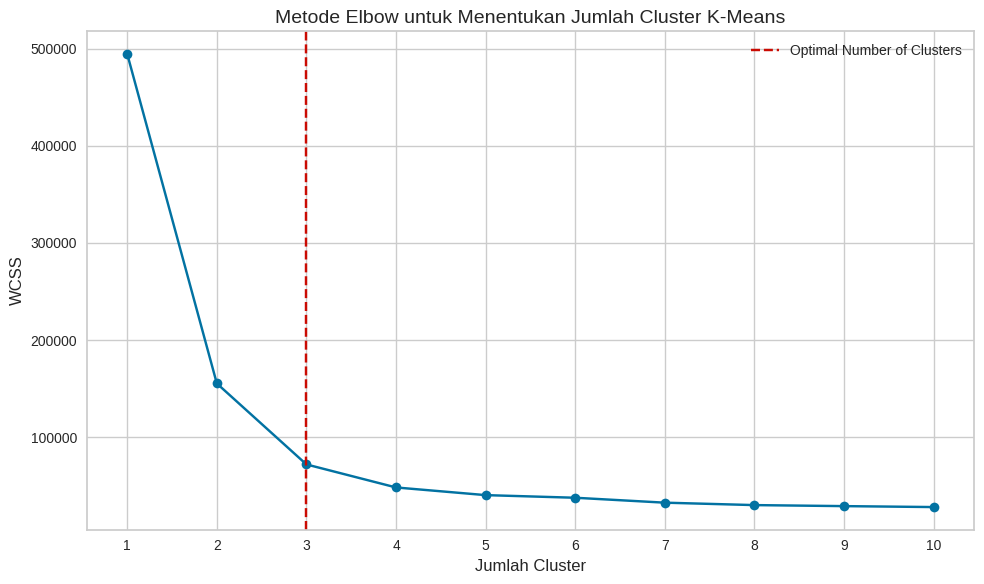

In [31]:
# Visualisasi Elbow untuk menentukan jumlah cluster optimal
n_clusters = range(1, 11)
wcss = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(n_clusters, wcss, marker='o', color='b', linestyle='-')
plt.xlabel('Jumlah Cluster', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster K-Means', fontsize=14)
plt.grid(True)
plt.xticks(n_clusters)
plt.axvline(x=3, color='r', linestyle='--', label='Optimal Number of Clusters')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [32]:
# Menghitung Silhouette Score
kmeans_silhouette = silhouette_score(df, kmeans_labels)

# Menghitung Davies-Bouldin Score
kmeans_db_score = davies_bouldin_score(df, kmeans_labels)

# Menyusun hasil clustering
clustering_scores = pd.DataFrame({
    'Clustering Method': ['K-Means'],
    'Silhouette Score': [kmeans_silhouette],
    'Davies-Bouldin Score': [kmeans_db_score]
})

clustering_scores

,Clustering Method,Silhouette Score,Davies-Bouldin Score
0,K-Means,0.535625,0.586176


In [33]:
#Type your code here

## **c. Feature Selection (Opsional)**

In [34]:
# Menggunakan PCA untuk mengurangi dimensionalitas
pca = PCA(n_components=2, random_state=42)
df_pca = pd.DataFrame(
    pca.fit_transform(df),
    columns=['PC1', 'PC2']
)

df_pca.head()

,PC1,PC2
0,-10.739701,0.382235
1,-10.736506,0.528705
2,-10.734802,0.584209
3,-9.741898,0.545548
4,-9.739164,0.391689


In [35]:
kmeans = KMeans(n_clusters=3, n_init=25, random_state=42)
km_labels = kmeans.fit_predict(df_pca)

df['KMeans_Cluster'] = km_labels
df['KMeans_Cluster'].value_counts()

,count
KMeans_Cluster,
0,2771
2,2254
1,1532


In [36]:
# Menghitung Silhouette Score
kmeans_silhouette = silhouette_score(df_pca, kmeans_labels)

# Menghitung Davies-Bouldin Score
kmeans_db_score = davies_bouldin_score(df_pca, kmeans_labels)

clustering_scores = pd.DataFrame({
    'Clustering Method': ['K-Means'],
    'Silhouette Score': [kmeans_silhouette],
    'Davies-Bouldin Score': [kmeans_db_score]
})

clustering_scores

,Clustering Method,Silhouette Score,Davies-Bouldin Score
0,K-Means,0.633574,0.444859


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

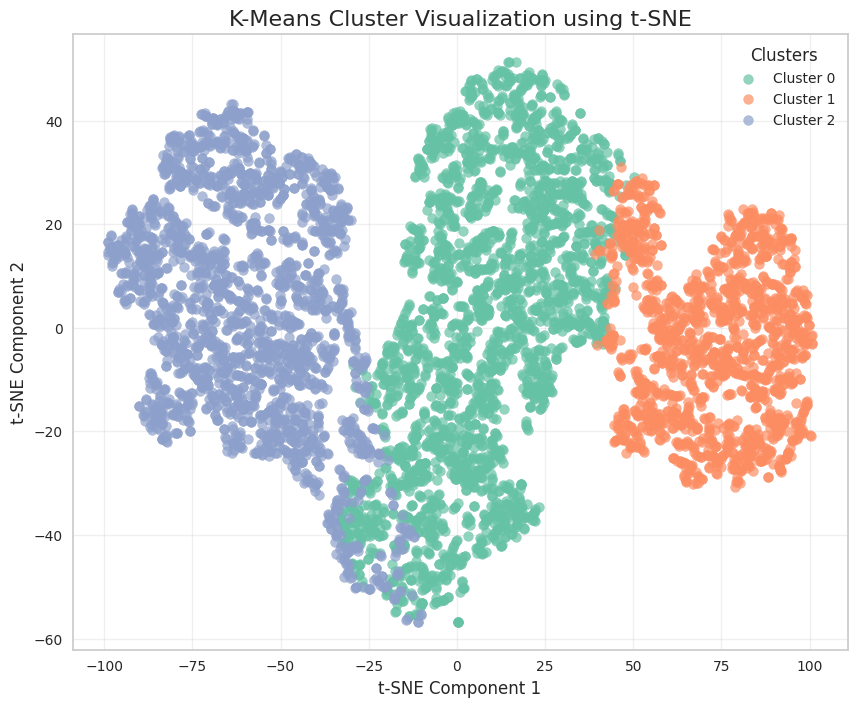

In [37]:
# Visualisasi hasil K-Means clustering menggunakan T-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df.drop(columns=['KMeans_Cluster']))

plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
color_palette = sns.color_palette("Set2", n_colors=4)

for cluster in sorted(df['KMeans_Cluster'].unique()):
    cluster_data = df[df['KMeans_Cluster'] == cluster]
    cluster_tsne = tsne_results[df['KMeans_Cluster'] == cluster]
    plt.scatter(
        cluster_tsne[:, 0], cluster_tsne[:, 1],
        label=f"Cluster {cluster}",
        color=color_palette[cluster],
        alpha=0.7,
        s=50
    )

plt.title("K-Means Cluster Visualization using t-SNE", fontsize=16)
plt.xlabel("t-SNE Component 1", fontsize=12)
plt.ylabel("t-SNE Component 2", fontsize=12)
plt.legend(title="Clusters", loc="upper right", fontsize=10)
plt.grid(alpha=0.3)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

In [38]:
# Menyusun statistik deskriptif berdasarkan cluster
cluster_stats = df.groupby('KMeans_Cluster').describe()

print(cluster_stats)

                   day                                                     \
                 count       mean       std   min   25%   50%   75%   max   
KMeans_Cluster                                                              
0               2771.0  17.003609  3.009010  12.0  14.0  17.0  20.0  22.0   
1               1532.0  27.466057  2.346146  23.0  26.0  28.0  29.0  31.0   
2               2254.0   6.241349  2.711510   1.0   4.0   6.0   8.0  11.0   

               previous            ... education_tertiary       \
                  count      mean  ...                75%  max   
KMeans_Cluster                     ...                           
0                2771.0  0.004331  ...                1.0  1.0   
1                1532.0  0.010444  ...                1.0  1.0   
2                2254.0  0.009760  ...                1.0  1.0   

               education_unknown                                               
                           count      mean       std  min  2

In [39]:
df.describe(include='all')

,day,previous,job_binned_retired,job_binned_services,job_binned_unemployed,job_binned_white-collar,month_binned_Q2,month_binned_Q3,poutcome_binned_other,poutcome_binned_success,...,campaign_binned_Medium,campaign_binned_High,pdays_binned_Contacted Once,pdays_binned_Contacted Multiple Times,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,KMeans_Cluster
count,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,...,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000
mean,15.748513,0.007625,0.052463,0.095470,0.061614,0.569925,0.699558,0.115144,0.997255,0.001068,...,0.416501,0.149764,0.003355,0.001830,0.565045,0.313711,0.503126,0.314168,0.041635,0.921153
std,8.453587,0.111577,0.222976,0.293886,0.240471,0.495124,0.458485,0.319220,0.052326,0.032659,...,0.493016,0.356867,0.057831,0.042744,0.495789,0.464036,0.500028,0.464219,0.199769,0.871926
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,22.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000
max,31.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


Berikut adalah analisis dan interpretasi untuk masing-masing cluster (Cluster 0, 1, dan 2) yang terdiri dari jumlah data sebagai berikut:
- Cluster 0: 2771 data
- Cluster 1: 1532 data
- Cluster 2: 2254 data

1. Cluster 0
  - Jumlah data: 2771
  - Job Binned:
Dominasi pada pekerjaan white-collar (job_binned_white-collar mean: 0.5699) menunjukkan cluster ini cenderung terdiri dari pekerja profesional.
  - Month Binned: Mayoritas aktivitas pada kuartal kedua (month_binned_Q2 mean: 0.6996), menunjukkan pelanggan ini lebih sering terlibat di tengah tahun.
  - Poutcome Binned:
Hampir seluruhnya hasil interaksi sebelumnya tidak berhasil (poutcome_binned_other mean: 0.9972).
  - Balance:
Didominasi oleh kategori saldo rendah hingga sedang (balance_binned_Low, balance_binned_Medium).
  - Marital Status:
Mayoritas adalah pelanggan yang menikah (marital_married mean: 0.565).
  - Education:
Sebagian besar memiliki tingkat pendidikan menengah (education_secondary mean: 0.5031).
  - Interpretasi:
Cluster ini mungkin merepresentasikan pelanggan dari kelas menengah dengan tingkat aktivitas yang cukup tinggi di kuartal kedua, namun dengan tingkat keberhasilan campaign rendah.

2. Cluster 1
  - Jumlah data: 1532
  - Job Binned:
Pekerjaan cenderung merata, tetapi ada sedikit dominasi services (job_binned_services mean: 0.0954), yang melibatkan pekerjaan di sektor jasa seperti perhotelan, transportasi, atau ritel.
  - Month Binned:
Aktivitas lebih tinggi pada kuartal ketiga (month_binned_Q3 mean: 0.1151), menunjukkan bahwa pelanggan ini lebih aktif atau responsif pada periode Juli-September.
  - Poutcome Binned:
Hampir seluruh interaksi sebelumnya tidak berhasil (poutcome_binned_other mean: mendekati 1), mirip dengan Cluster 0, mengindikasikan potensi perbaikan strategi komunikasi kampanye..
  - balance:
Sebagian besar pelanggan memiliki saldo rendah hingga sedang, dengan proporsi lebih besar pada balance_binned_Low.
  - Marital Status:
Proporsi pelanggan menikah cukup tinggi (marital_married mean: 0.565).
  - education:
Sebagian besar memiliki pendidikan menengah (education_secondary mean: 0.5031), dengan proporsi kecil pendidikan dasar dan tinggi.
  - Interpretasi:
Cluster ini mencerminkan pekerja jasa dari kelas menengah, yang lebih aktif di kuartal ketiga. Strategi pemasaran dapat berfokus pada kampanye di periode ini dengan penawaran yang relevan untuk sektor jasa.

3. Cluster 2
  - Jumlah data: 2254
  - Job Binned:
Dominasi pekerjaan white-collar (job_binned_white-collar mean: 0.5699), mirip dengan Cluster 0, menunjukkan pelanggan profesional atau administrasi..
  - Month Binned:
Aktivitas lebih merata sepanjang waktu, meskipun ada sedikit kecenderungan pada kuartal kedua (month_binned_Q2 mean: 0.6996).
  - Poutcome Binned:
Hampir seluruh hasil interaksi sebelumnya tidak berhasil (poutcome_binned_other mean: mendekati 1).
  - Balance:
Sebagian besar pelanggan memiliki saldo rendah hingga sedang (balance_binned_Low dan balance_binned_Medium).
  - Marital Status:
Mayoritas adalah pelanggan yang menikah.
  - education:
Sebagian besar memiliki pendidikan menengah, tetapi dengan proporsi pendidikan tinggi yang lebih besar dibandingkan Cluster 0 dan Cluster 1.
  - Interpretasi:
aktivitas pelanggan cenderung lebih merata sepanjang waktu. Cluster ini juga berisi pelanggan kelas menengah dengan saldo yang cenderung rendah.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [40]:
df.to_csv('bank_campaign.csv', index=False)